### <a id='overview'>1. Overview</a>

#### Motivation
- To explore factors that correlate with shooting incidents in New York City (NYC)
- To have **timelapse animated map of shooting incidents in NYC** between 2006 and 2020.  Results are shown below.

<img src="./per_precinct.gif" width="700" align="left"/>
<img src="./per_capita.gif" width="700" align="left"/>

#### Method
- NYPD historic shooting data, NYPD precinct data, and NYPD precinct shape file are combined to answer the below questions
- libraries such as pandas, pandasql, geopandas, and matplotlib are used to explore, clean, and combine data

#### Questions to be answered
- Is a particular day of that week that is more crime prone?
- Is a particular season (spring, summer, etc) that is more crime prone?
- Is there a particular time of the day that is more crime prone?
- Which specific combination of perpetrator-victim characteristics account for the highest percentage of the crime
- Which precinct is most crime prone?

### <a id='sam'>2. About the author: Kam Leung Yeung (Sam)</a>

* PhD in Cognitive Psychology, Iowa State University in Ames, Iowa, USA

**Social media**:

* [LinkedIn](https://www.linkedin.com/in/kamleungyeung/)
* [Google Scholar](https://scholar.google.com/citations?user=OwUmaN8AAAAJ)
* [GitHub](https://github.com/k-l-yeung)
* [Tableau](https://public.tableau.com/app/profile/kam.leung.yeung#!/)


Data sources
- [NYPD Shooting Incident Data (Historic)](https://catalog.data.gov/dataset/nypd-shooting-incident-data-historic)
  - [NYC police precinct data](https://johnkeefe.net/nyc-police-precinct-and-census-data)
  - [Data dictionary on NYC population features](https://www.documentcloud.org/documents/87708-pl94-171-1.html#document/p64)
  - [Precinct Shapefile, KMZ, GeoJSON](https://geodata.lib.berkeley.edu/catalog/nyu-2451-34568)
- Related: 
 - [NYPD arrest data (Historic)](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u)
 - Evidence of weather and crime: [1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7310019/), [2](https://online.vwu.edu/news/environmental-studies/weather-and-crime/), [3](https://www.chicagotribune.com/data/ct-crime-heat-analysis-htmlstory.html), [4](https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html)

### <a id='toc'>3. Table of content</a>

1. <a href='#overview'>Overview</a>  
2. <a href='#sam'>About the author: Kam Leung Yeung</a> 
3. <a href='#toc'>Table of content</a> 
4. <a href='#eda'>Data exploration</a>  
 - <a href='#nypd'>NYPD Shooting Incident Data</a>  
 - <a href='#convert data'>Convert data type</a>  
 - <a href='#add variables'>Add time-related variables</a>  
 - <a href='#unique summary'>Get each feature's unique value summary</a>  
 - <a href='#plot'>Plot the distribution of features</a>  
 - <a href='#clean'>Clean data</a>  
 - <a href='#crosscategory'>Cross categorical features plots</a>  
5. <a href='#timelapse'>Create the timelapse maps</a>  
 - <a href='#pop'>Read in precinct population data</a>  
 - <a href='#cast'>Prepare the casted df</a>  
 - <a href='#merge'>Merge nyc shooting, nyc precinct population, and nypd precinct map files together</a>  
 - <a href='#gif'>Create gif file of shooting in precinct</a>  
 - <a href='#percapita'>Create shooting incidents per 10000 people gif animated graph</a>  



### <a id='eda'>4. Data Exploration</a>

In [1]:
from datetime import datetime
import os

import numpy as np
import numbers
import math
from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import imageio
%matplotlib inline

import pandas as pd
from pandasql import sqldf
from pandas.api.types import CategoricalDtype
import geopandas as gpd


<a href='#toc'>Back to table of content</a>

#### <a id='nypd'>NYPD Shooting Incident Data</a>

In [2]:
# read data and have a quick look
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23568 entries, 0 to 23567
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             23568 non-null  int64  
 1   OCCUR_DATE               23568 non-null  object 
 2   OCCUR_TIME               23568 non-null  object 
 3   BORO                     23568 non-null  object 
 4   PRECINCT                 23568 non-null  int64  
 5   JURISDICTION_CODE        23566 non-null  float64
 6   LOCATION_DESC            9987 non-null   object 
 7   STATISTICAL_MURDER_FLAG  23568 non-null  bool   
 8   PERP_AGE_GROUP           15109 non-null  object 
 9   PERP_SEX                 15143 non-null  object 
 10  PERP_RACE                15143 non-null  object 
 11  VIC_AGE_GROUP            23568 non-null  object 
 12  VIC_SEX                  23568 non-null  object 
 13  VIC_RACE                 23568 non-null  object 
 14  X_COORD_CD            

In [4]:
display(df.head(3))
display(df.tail(3))

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  \
0     201575314  08/23/2019   22:10:00     QUEENS       103   
1     205748546  11/27/2019   15:54:00      BRONX        40   
2     193118596  02/02/2019   19:40:00  MANHATTAN        23   

   JURISDICTION_CODE LOCATION_DESC  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP  \
0                0.0           NaN                    False            NaN   
1                0.0           NaN                    False            <18   
2                0.0           NaN                    False          18-24   

  PERP_SEX       PERP_RACE VIC_AGE_GROUP VIC_SEX        VIC_RACE X_COORD_CD  \
0      NaN             NaN         25-44       M           BLACK    1037451   
1        M           BLACK         25-44       F           BLACK    1006789   
2        M  WHITE HISPANIC         18-24       M  BLACK HISPANIC     999347   

  Y_COORD_CD   Latitude  Longitude  \
0     193561  40.697805 -73.808141   
1     237559  40.818700 -73.918571   
2     227795  40.791916 -73.945480   

                                         Lon_Lat  
0  POINT (-73.80814071699996 40.697805308000056)  
1   POINT (-73.91857061799993 40.81869973000005)  
2  POINT (-73.94547965999999 40.791916091000076)

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME      BORO  PRECINCT  \
23565     220870730  11/21/2020   08:05:00  BROOKLYN        60   
23566     208187330  01/18/2020   01:00:00     BRONX        42   
23567     220848244  11/21/2020   15:35:00  BROOKLYN        79   

       JURISDICTION_CODE              LOCATION_DESC  STATISTICAL_MURDER_FLAG  \
23565                0.0                        NaN                     True   
23566                2.0  MULTI DWELL - PUBLIC HOUS                    False   
23567                2.0  MULTI DWELL - PUBLIC HOUS                    False   

      PERP_AGE_GROUP PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX VIC_RACE  \
23565            NaN      NaN       NaN         45-64       M    WHITE   
23566            NaN      NaN       NaN         45-64       M    BLACK   
23567          25-44        M     BLACK         25-44       M    BLACK   

      X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
23565    1046405     187113  40.680049 -73.775909   
23566    1011373     182202  40.666746 -73.902232   
23567     999475     172871  40.641163 -73.945142   

                                             Lon_Lat  
23565  POINT (-73.77590919399995 40.680048726000045)  
23566   POINT (-73.90223237399994 40.66674580000005)  
23567   POINT (-73.94514161199999 40.64116269600004)

<AxesSubplot:>

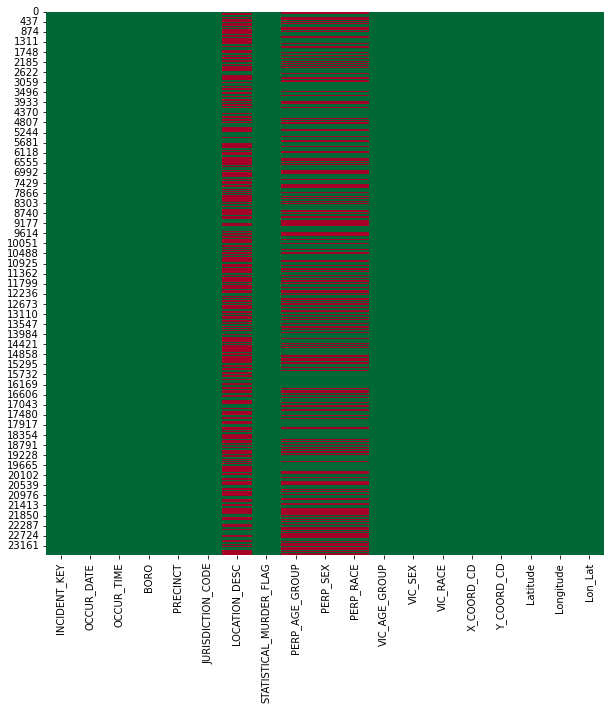

In [5]:
# show missing pattern in the data
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:])
sns.heatmap(df.isnull(), cmap ='RdYlGn_r',cbar=False, ax=ax)

Some perpetrators information is missing, as they are probably still at large.

<a href='#toc'>Back to table of content</a>

#### <a id='convert data'>Convert data to their appropriate types</a>

In [6]:
# change to datetime object
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], infer_datetime_format=True)
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], infer_datetime_format=True)


<a href='#toc'>Back to table of content</a>

#### <a id='add variables'>Add time-related variables</a>

In [7]:
df['year'] = df['OCCUR_DATE'].dt.year
df['quarter'] = df['OCCUR_DATE'].dt.quarter
df['month'] = df['OCCUR_DATE'].dt.month
df['day_of_week'] = df['OCCUR_DATE'].dt.dayofweek
df['week_of_year'] = df['OCCUR_DATE'].dt.weekofyear
df['hour'] = df['OCCUR_TIME'].dt.hour


C:\Users\siu_s\AppData\Local\Temp/ipykernel_8060/1654847550.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['OCCUR_DATE'].dt.weekofyear


<a href='#toc'>Back to table of content</a>

#### <a id='unique summary'>Get each feature's unique value summary</a>

In [8]:
# this function should be able to take a df with ANY dtype and display each col's unique value
def var_unique_value_info (df):
    import numbers
    col_names = list(df.columns)
    total_unique = []
    value_holder = []
    threshold = 10
    for name in col_names:
        length = len(df[name].unique())
        # only list the levels of categories if the total level is < thresholds 
        if length <=threshold:
            joined_unique_value = ""
            list_with_unique_value = df[name].unique()
            a = list_with_unique_value[0]
            # dealing with nan (missing) value
            if isinstance(a, (float,np.floating)):
                import math
                if math.isnan(a):
                    # replace missing with "NaN" string
                    list_with_unique_value[0] = "NaN"
            # if the values are numeric, convert it to string before joining them            
            if isinstance(a, (numbers.Integral, np.floating)):
                # print(list_with_unique_value[0])
                list_with_unique_value = list(map(str, list_with_unique_value))
                start = "NUMERIC: "
                joined_unique_value = ', '.join(list_with_unique_value)
                joined_unique_value = start + joined_unique_value
                value_holder.append(joined_unique_value)
            # if it is not float nor number data type
            else:
                # if the variable is bool (returning either True or False)
                if a == True or a == False:
                    # replace the True and False with string. that ensures 
                    list_with_unique_value = ['True', 'False']
                joined_unique_value = ', '.join(list_with_unique_value)
                value_holder.append(joined_unique_value)
        else:
            value_holder.append("> " + str(threshold) + " unique values")
        total_unique.append(length)

    name_unique = pd.DataFrame()
    name_unique['col_name'] = col_names
    name_unique['total_unique_value'] = total_unique
    name_unique['values'] = value_holder
    return name_unique.sort_values(by='total_unique_value', ascending=False)

In [9]:
var_unique_value_info(df)

col_name  total_unique_value  \
0              INCIDENT_KEY               18562   
18                  Lon_Lat               10540   
17                Longitude               10404   
16                 Latitude               10399   
15               Y_COORD_CD                9765   
14               X_COORD_CD                9477   
1                OCCUR_DATE                5054   
2                OCCUR_TIME                1401   
4                  PRECINCT                  77   
23             week_of_year                  53   
6             LOCATION_DESC                  40   
24                     hour                  24   
19                     year                  15   
21                    month                  12   
8            PERP_AGE_GROUP                  10   
10                PERP_RACE                   8   
13                 VIC_RACE                   7   
22              day_of_week                   7   
11            VIC_AGE_GROUP                   6   
3                      BORO                   5   
9                  PERP_SEX                   4   
5         JURISDICTION_CODE                   4   
20                  quarter                   4   
12                  VIC_SEX                   3   
7   STATISTICAL_MURDER_FLAG                   2   

                                               values  
0                                  > 10 unique values  
18                                 > 10 unique values  
17                                 > 10 unique values  
16                                 > 10 unique values  
15                                 > 10 unique values  
14                                 > 10 unique values  
1                                  > 10 unique values  
2                                  > 10 unique values  
4                                  > 10 unique values  
23                                 > 10 unique values  
6                                  > 10 unique values  
24                                 > 10 unique values  
19                                 > 10 unique values  
21                                 > 10 unique values  
8   NaN, <18, 18-24, 25-44, 45-64, UNKNOWN, 65+, 1...  
10  NaN, BLACK, WHITE HISPANIC, BLACK HISPANIC, UN...  
13  BLACK, BLACK HISPANIC, WHITE HISPANIC, WHITE, ...  
22                       NUMERIC: 4, 2, 5, 3, 0, 6, 1  
11             25-44, 18-24, 45-64, <18, 65+, UNKNOWN  
3   QUEENS, BRONX, MANHATTAN, STATEN ISLAND, BROOKLYN  
9                                        NaN, M, F, U  
5                         NUMERIC: 0.0, 2.0, 1.0, nan  
20                                NUMERIC: 3, 4, 1, 2  
12                                            M, F, U  
7                                         True, False

<a href='#toc'>Back to table of content</a>

#### <a id='plot'>Plot the distribution of features</a>

In [10]:
# variables must have number of levels <= level_threshold to be plotted (to save plot time)
def plot_by_dtype(df, level_threshold=100):
    
    # violin/histogram plot
    # frequency plot for categorical variables
    import math
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    # optional to use ggplot style
    plt.style.use('ggplot')

    # to avoid excessive plot time, only allow cat variables with a max of certain levels of values
    threshold = 100
    col_name = list(df.columns)
    shortlisted = []
    for name in col_name:
        if len(df[name].unique()) <= level_threshold:
            shortlisted.append(name)
    # only columns with levels fewer than the threshold are kept
    df = df[shortlisted]

    # get all the unique dtype names in a list
    dtype_pd_series = df.dtypes
    col_names = list(dtype_pd_series.index)
    hold=[]
    for name in col_names:
        hold.append(str(dtype_pd_series.get(name)))
    data_type=list(set(hold))
    data_type
    dtype_length = len(data_type)
    
    for i in range(0,dtype_length):
        current_dtype = data_type[i]       
        # MAY NEED CHANGE: other numerical data type might be present (uint32 and uint8)
    #     numeric_col_name = list(df.dtypes.index)
        numeric_col_name = list(df.dtypes[(df.dtypes==current_dtype)].index)
        total_plot = len(numeric_col_name)
        print(str(total_plot) + " plots in total for " + current_dtype)
        plot_tracker = 0

        # violin plot: 4 rows and 2 cols, total of 8 plots
        n_cols = 2 # 2 plots per row
        n_rows = math.ceil(total_plot/2)

        for i in range(n_rows): # rows of plot (n_rows)

            # cols of plot (n_cols)
            fg,ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(14, 3)) # 12, 8 specify the size for individual plot
            for j in range(n_cols): # for each row of plot, there are 2 subplots
                if plot_tracker == total_plot:
                    break
                else:
                    # for categorical data
                    # for violin plot, use: # sns.violinplot(x= numeric_col_name[i*n_cols+j], data= df , ax=ax[j])
                    if current_dtype in ('object' or 'category'):
                        sns.countplot(x= numeric_col_name[i*n_cols+j], data= df, palette='hls' , ax=ax[j]) 
                    # for boolean data type, the "ax=ax[j] generates error"
                    if current_dtype == 'bool':
                        sns.countplot(x= numeric_col_name[i*n_cols+j], data= df, palette='hls') 
                    # for numerical data
                    else:
                        sns.histplot(x= numeric_col_name[i*n_cols+j], data= df , ax=ax[j])
                    plot_tracker+=1

7 plots in total for int64
8 plots in total for object
1 plots in total for float64
1 plots in total for bool


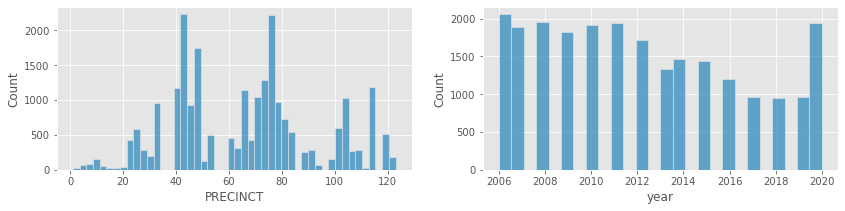

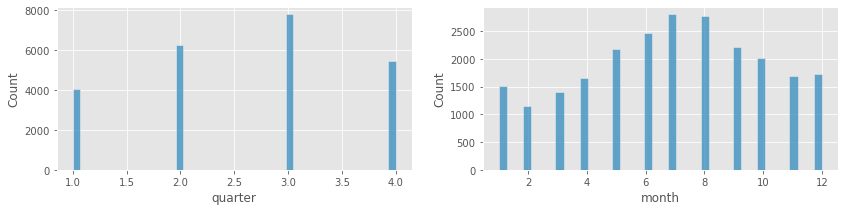

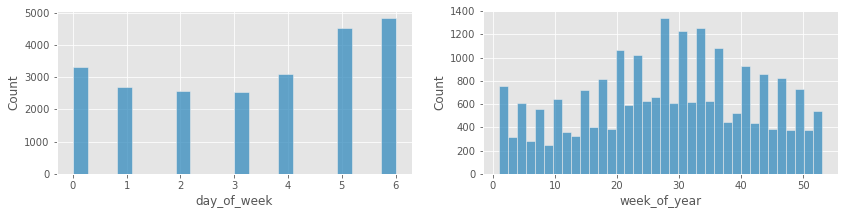

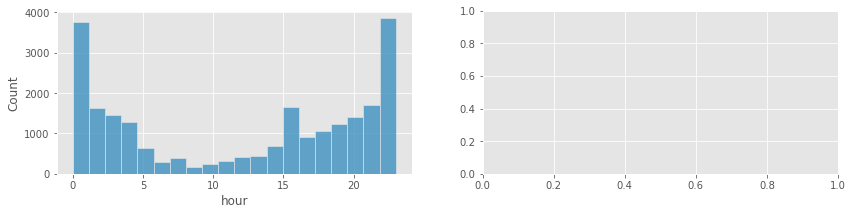

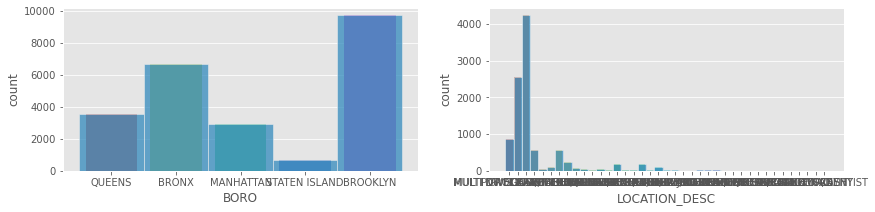

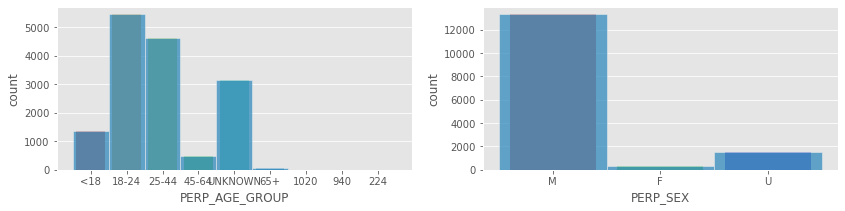

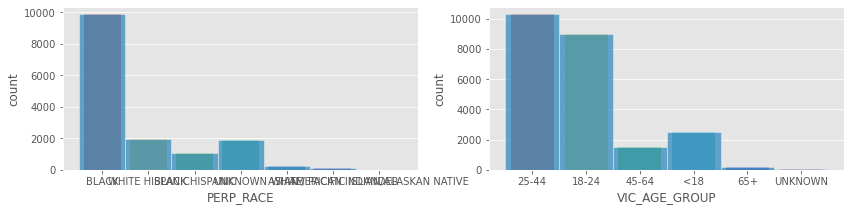

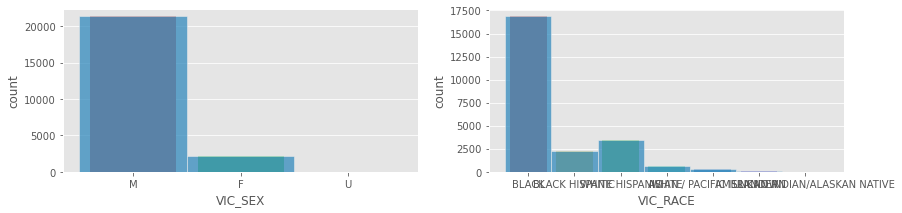

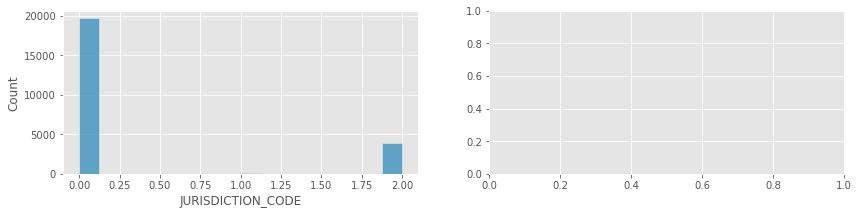

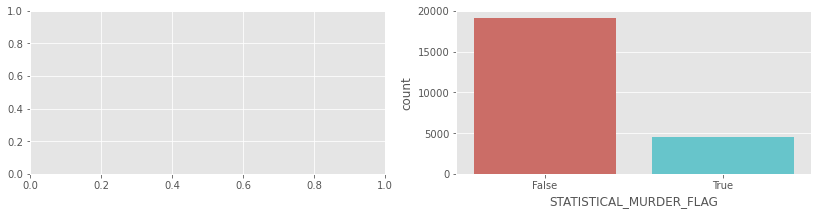

In [11]:
plot_by_dtype(df, 100)

<a href='#toc'>Back to table of content</a>

#### <a id='clean'>clean data</a>

In [12]:
# Above plots show that the feature PREP_AGE_GROUP has 3 values that do not make sense. Check them out before deletion
from pandasql import sqldf

# make the calling pysqldf a bit easier
def pysqldf(q):
    return sqldf(q, globals())

# can directly read a df
q1 = """
select * 
from df 
where PERP_AGE_GROUP in ("1020", "940", "224")  ;
"""

pysqldf(q1) # the output of the sql is a dataframe object


INCIDENT_KEY                  OCCUR_DATE                  OCCUR_TIME  \
0     142247967  2015-04-19 00:00:00.000000  2021-10-29 02:05:00.000000   
1      89595619  2013-03-12 00:00:00.000000  2021-10-29 20:28:00.000000   
2      71625599  2010-03-06 00:00:00.000000  2021-10-29 04:14:00.000000   

       BORO  PRECINCT  JURISDICTION_CODE              LOCATION_DESC  \
0     BRONX        47                2.0  MULTI DWELL - PUBLIC HOUS   
1  BROOKLYN        90                0.0                GAS STATION   
2     BRONX        41                0.0             BAR/NIGHT CLUB   

   STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  ... Y_COORD_CD   Latitude  \
0                        0           1020        M  ...     261252  40.883658   
1                        0            940        M  ...     196230  40.705268   
2                        0            224        M  ...     235312  40.812520   

   Longitude                                        Lon_Lat  year quarter  \
0 -73.847848       POINT (-73.847847932 40.883658466000036)  2015       2   
1 -73.927344  POINT (-73.92734370600002 40.705268069000056)  2013       1   
2 -73.902813  POINT (-73.90281300199997 40.812520134000074)  2010       1   

   month  day_of_week week_of_year  hour  
0      4            6           16     2  
1      3            1           11    20  
2      3            5            9     4  

[3 rows x 25 columns]

In [13]:
# delete the cases with wrong age group and check the operation
display(len(df))
df = df[df['PERP_AGE_GROUP'] != "1020"]
df = df[df['PERP_AGE_GROUP'] != "940"]
df = df[df['PERP_AGE_GROUP'] != "224"]
display(len(df))

23568

23565

In [14]:
# sort levels of variables that can be ordered such as age
from pandas.api.types import CategoricalDtype
df['PERP_AGE_GROUP']=df['PERP_AGE_GROUP'].astype(CategoricalDtype(categories=['<18', '18-24', '25-44','45-64','65+','UNKNOWN'], ordered = True))
df['VIC_AGE_GROUP']=df['VIC_AGE_GROUP'].astype(CategoricalDtype(categories=['<18', '18-24', '25-44','45-64','65+','UNKNOWN'], ordered = True))


<a href='#toc'>Back to table of content</a>

#### <a id='crosscategory'>Cross categorical features plots</a>

In [15]:
# indices of features of interest for heatmap plots
of_interest = [3,8,9,10,11, 12, 13, 21, 22,24]
col_names = list(df.columns)
col_names = [ele for index, ele in enumerate(col_names) if index in of_interest]
col_names

['BORO',
 'PERP_AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'VIC_AGE_GROUP',
 'VIC_SEX',
 'VIC_RACE',
 'month',
 'day_of_week',
 'hour']

In [16]:
# crosstab table frequency plot, for pairs of categorical variables
# create a function tha plots all the combination of the variable of interests
def heatmap(df, col_names):
    # get the combination of variables that will show interesting heatmap plot
    from itertools import combinations
    per = [comb for comb in combinations(col_names, 2)]
    # total plots
    total_plot = len(per)
    print(str(total_plot) + " plots in total")
    plot_tracker = 0  # track current plot
    sns.set(font_scale=.8) # set the scale of the font size, percentage
    n_cols = 2 # 2 plots per row
    n_rows = math.ceil(total_plot/2) # calculated base on the total plots required
    index = 0
    for i in range(n_rows): # rows of plot (n_rows)
        fg,ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(18, 6))
        for j in range(n_cols): # for each row of plot, there are 2 subplots
            if plot_tracker == total_plot:
                break
            else:
                # relative frequency (as %) of occurance                                                             
                df2 = pd.crosstab(df[per[index][0]], df[per[index][1]]).div(len(df)/100)
                # "_r" reverse the color scheme of "RdYlGn"
                # xticklabels: show the label for each level in the variable
                sns.heatmap(df2, annot=True, cmap ='RdYlGn_r', cbar_kws={'label': 'Percentage of all shooting'}\
                     ,xticklabels=True, yticklabels=True, ax=ax[j]) #ax = ax[j] ensures all col in each row is used
                plt.rcParams["axes.labelsize"] = 15
                plot_tracker+=1
                index+=1

45 plots in total


C:\Users\siu_s\AppData\Local\Temp/ipykernel_8060/3763799547.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fg,ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(18, 6))


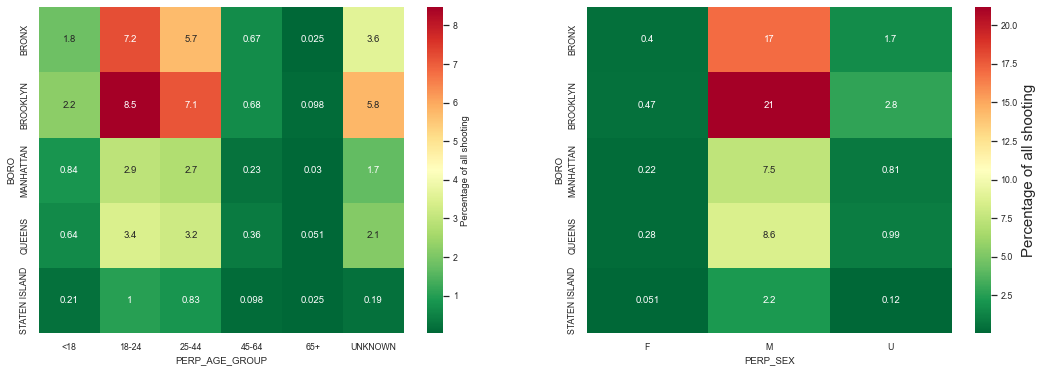

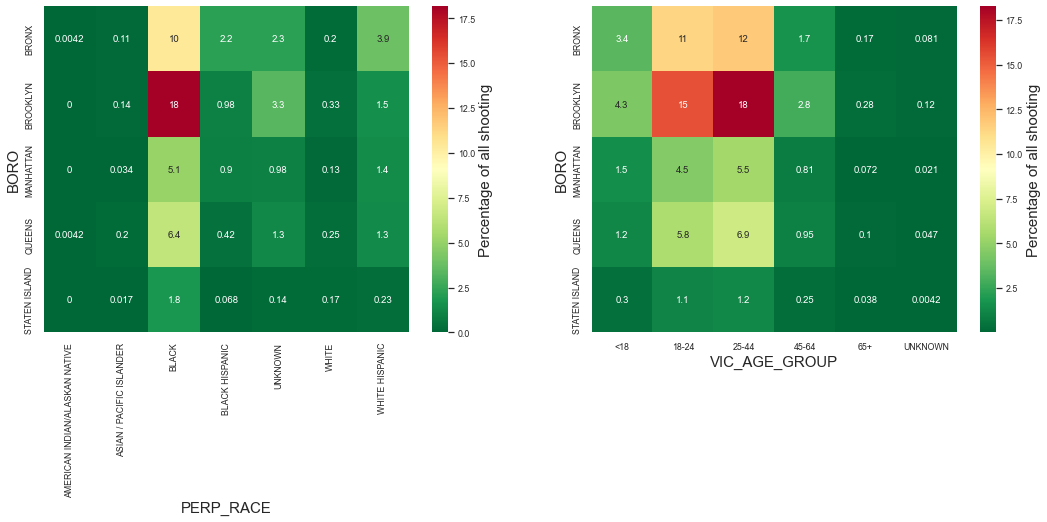

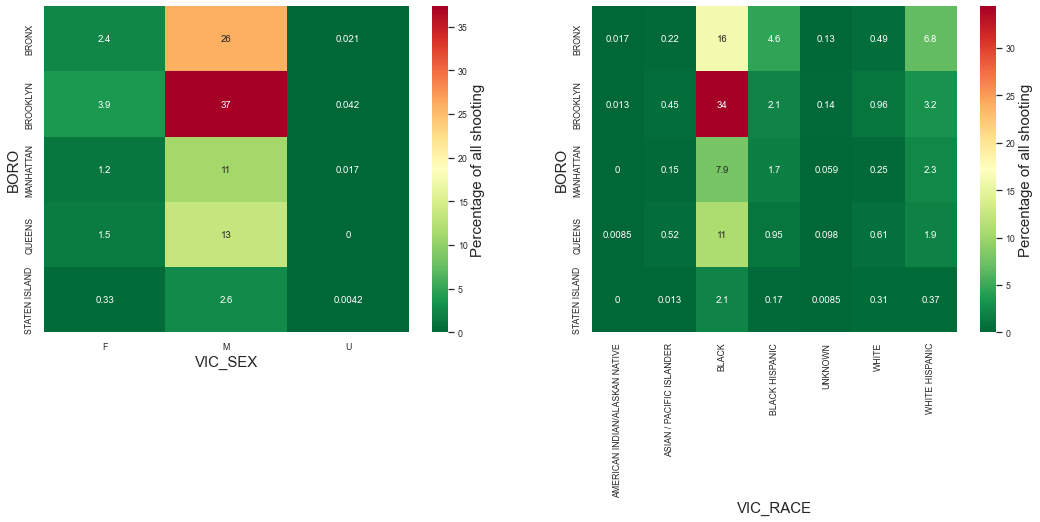

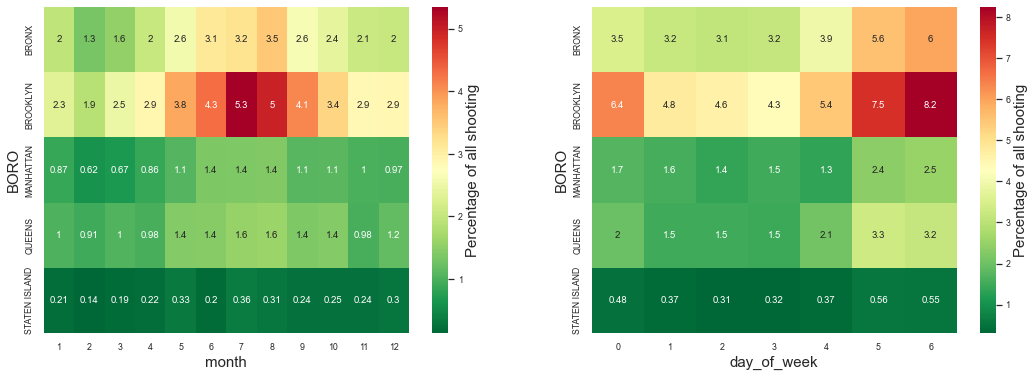

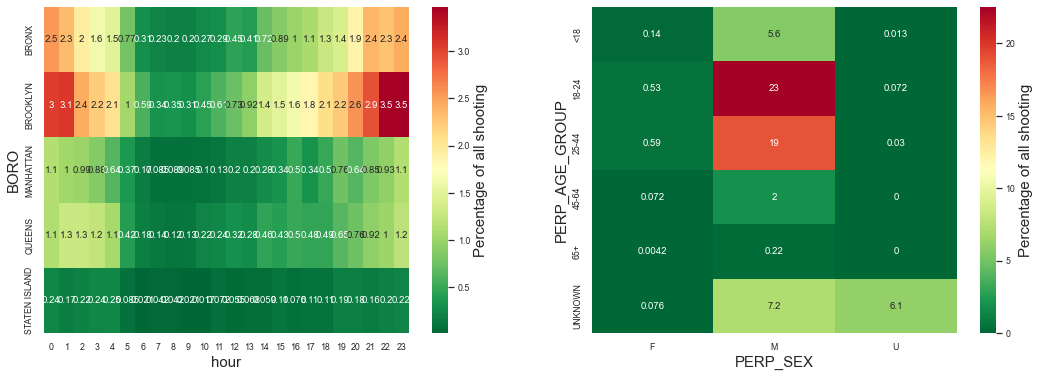

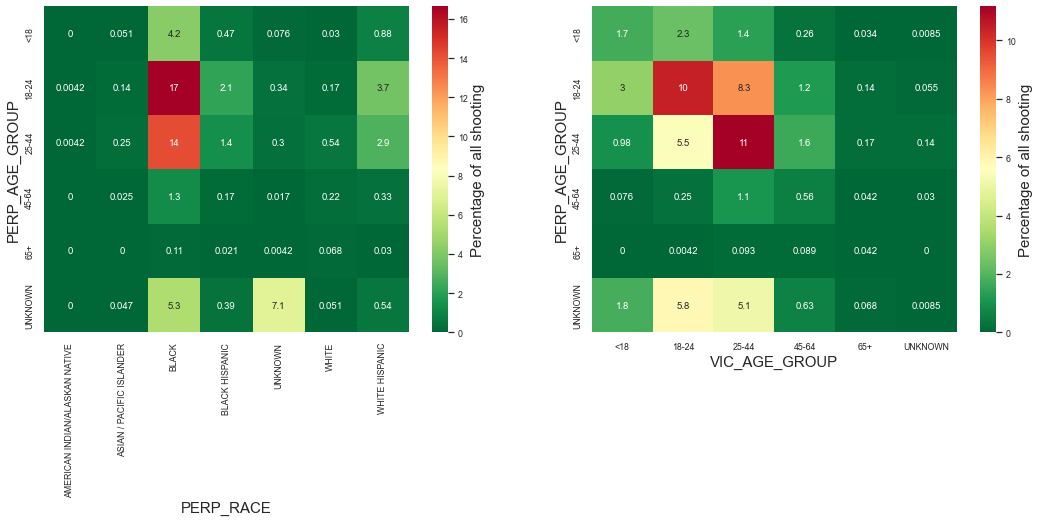

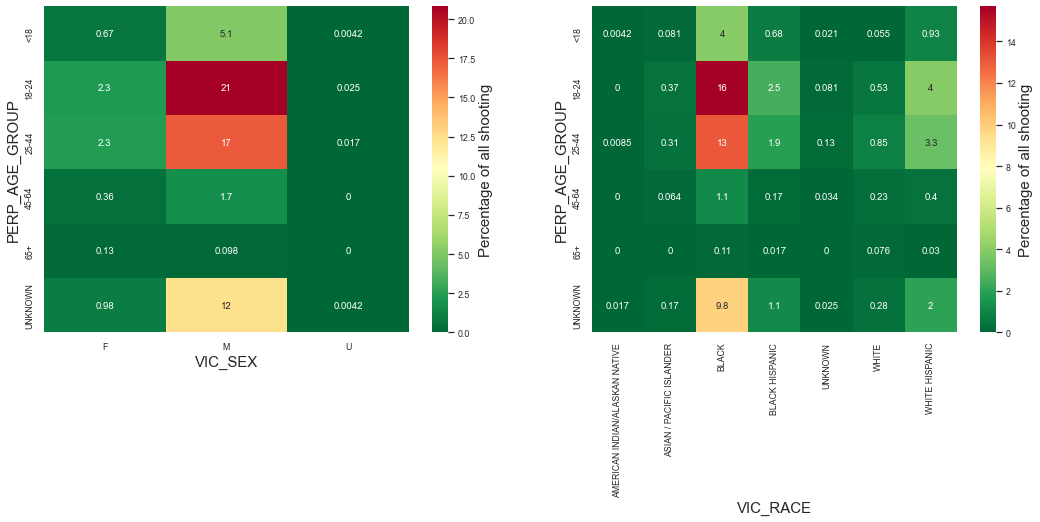

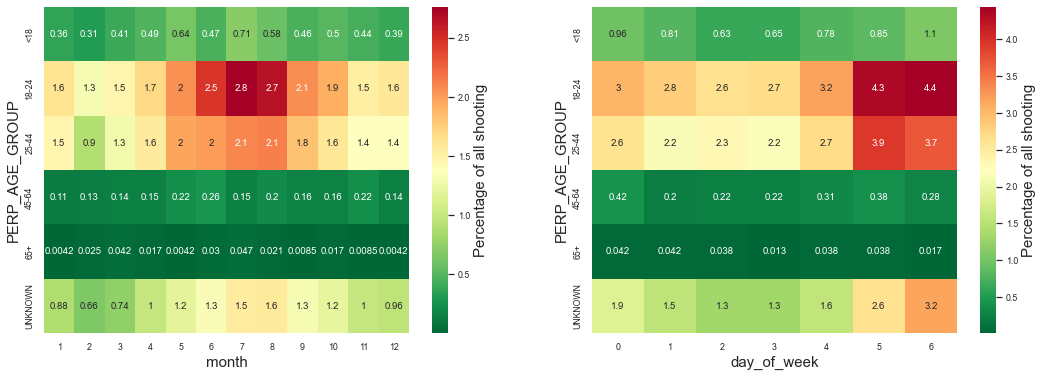

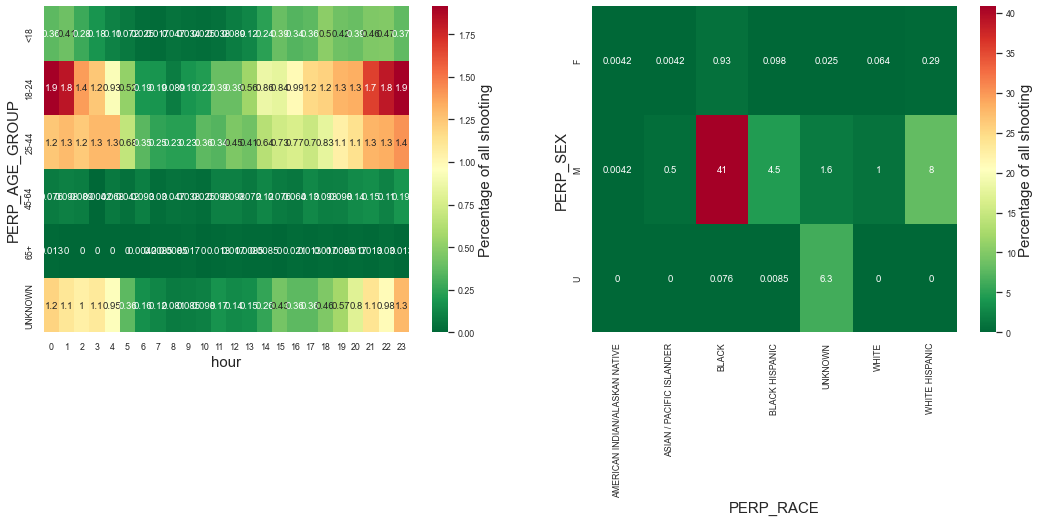

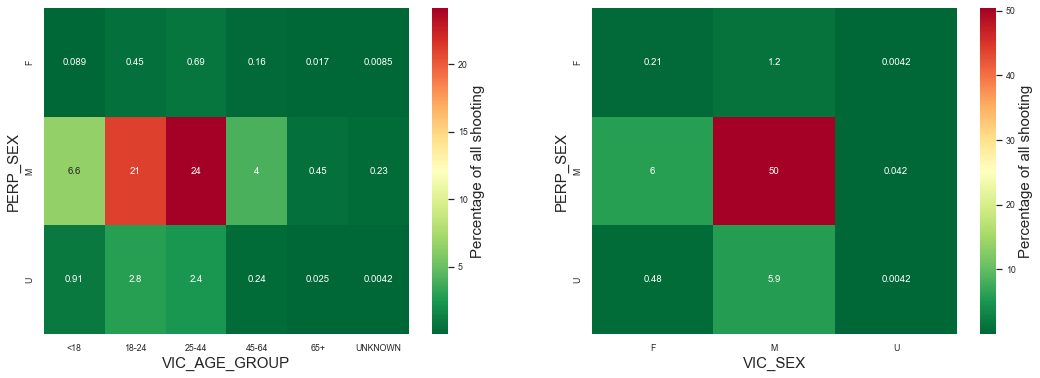

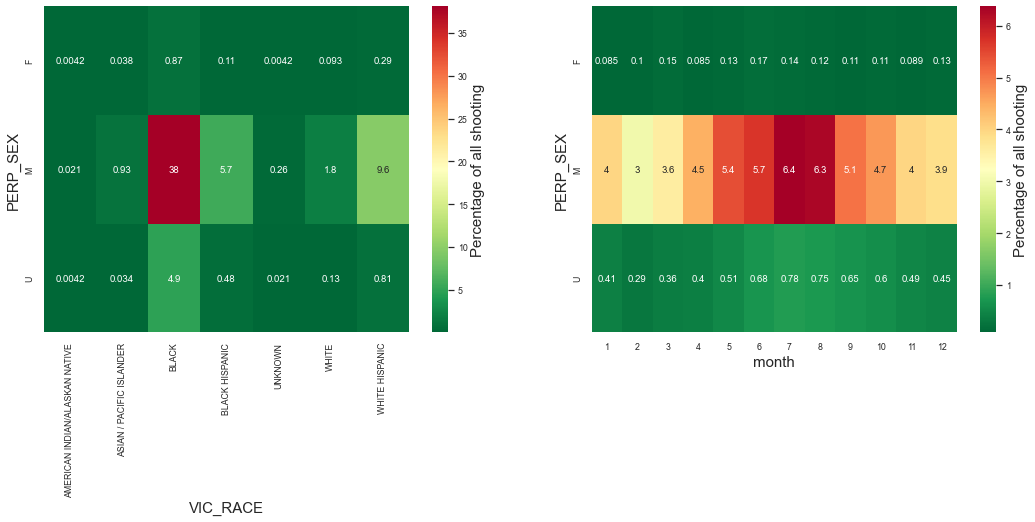

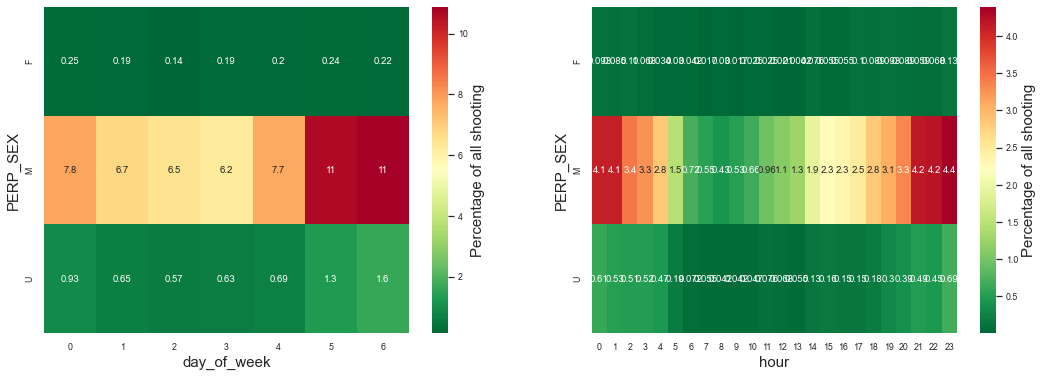

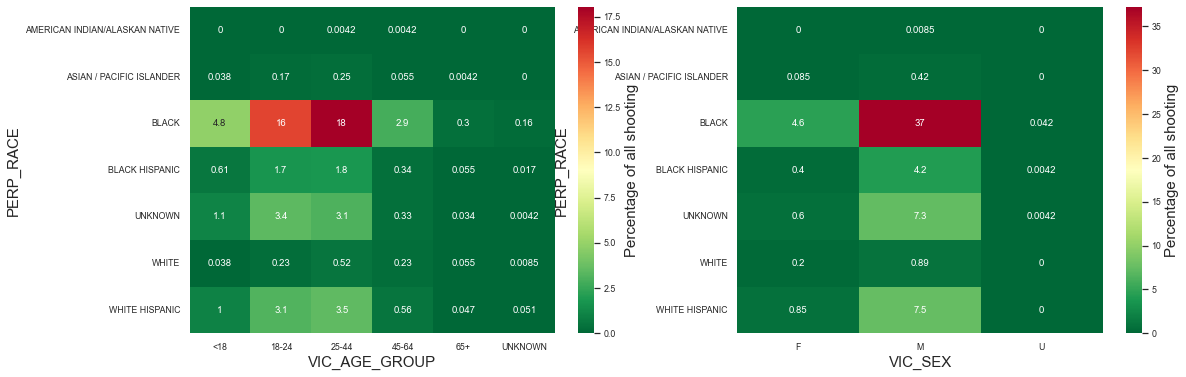

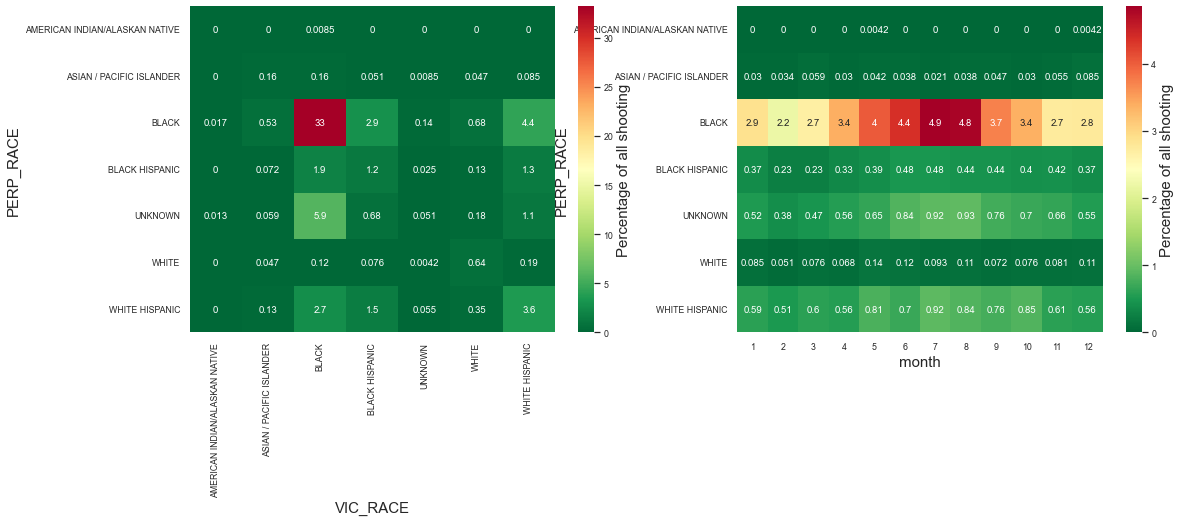

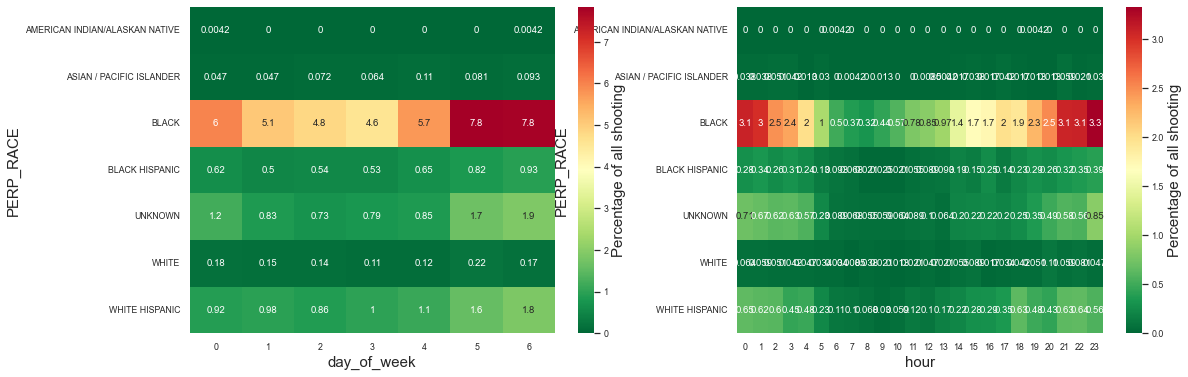

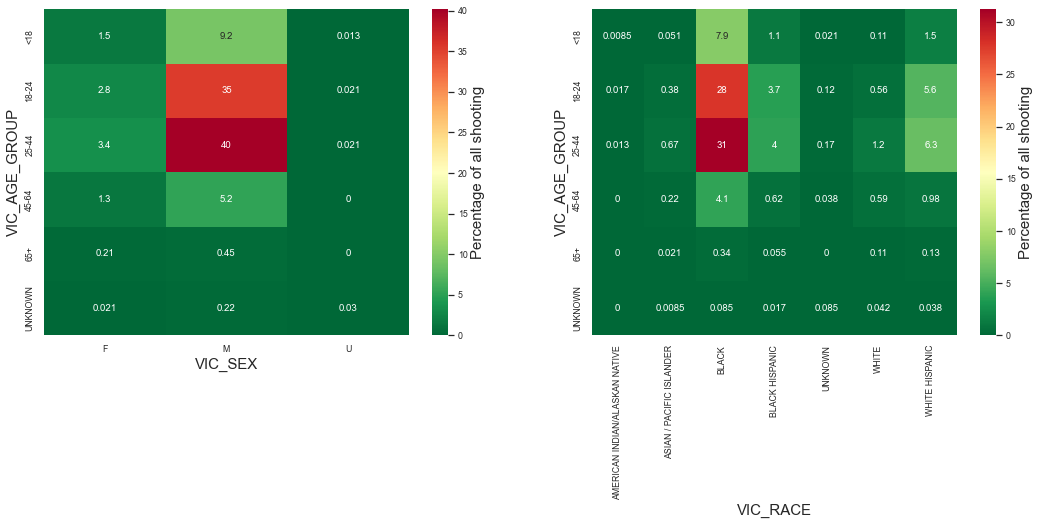

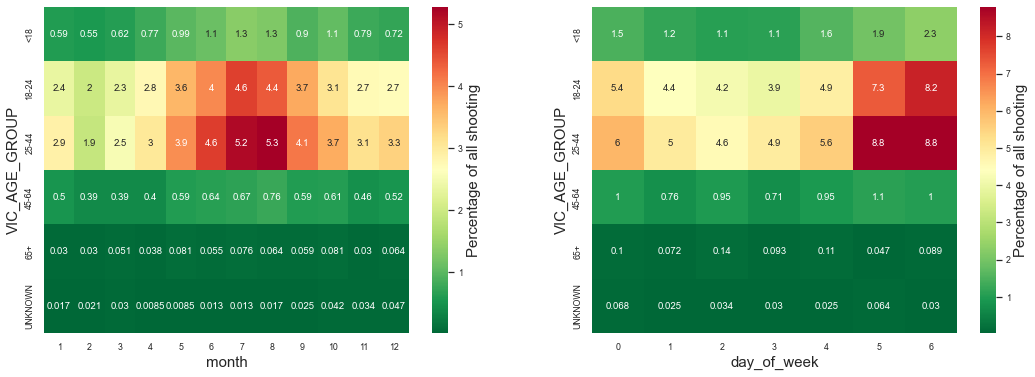

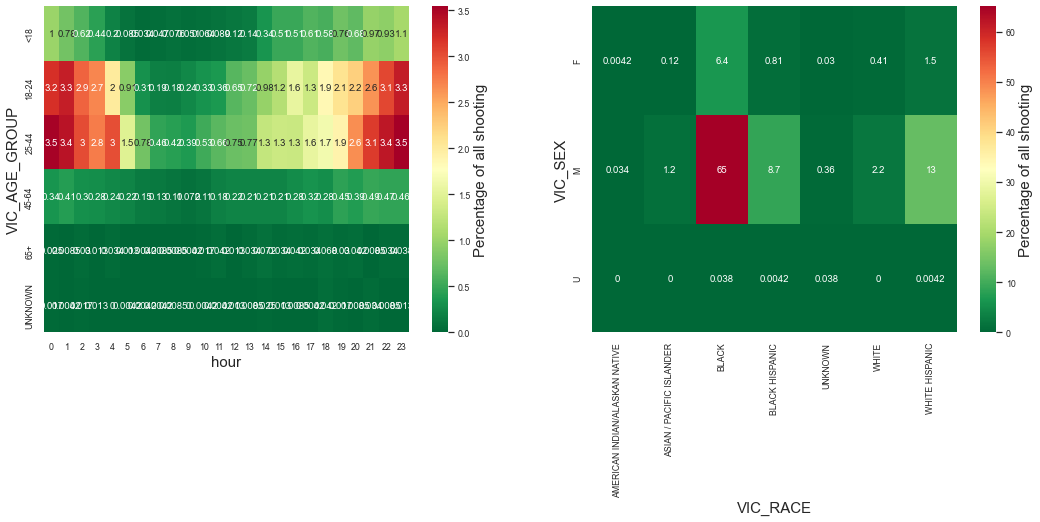

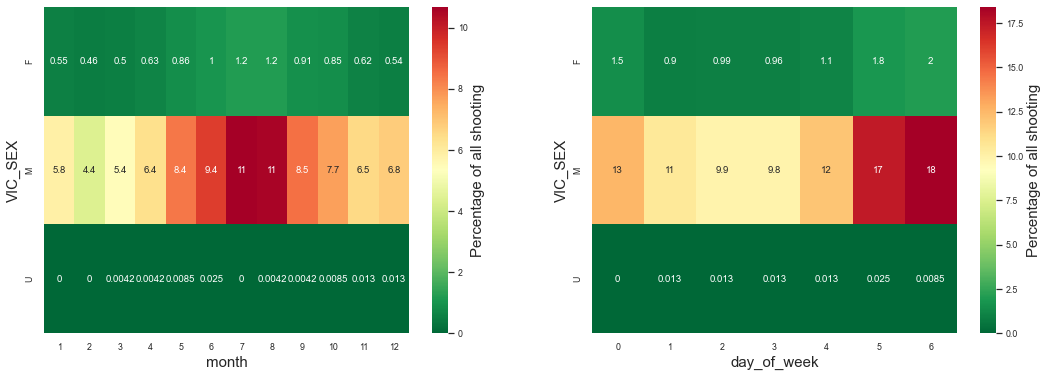

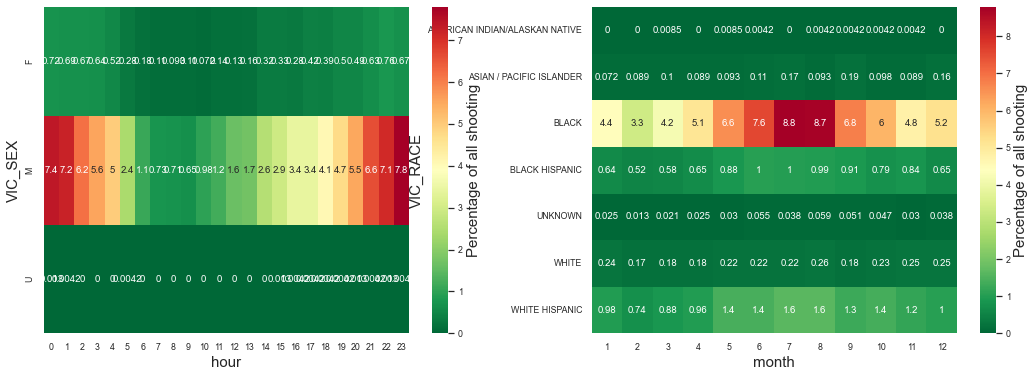

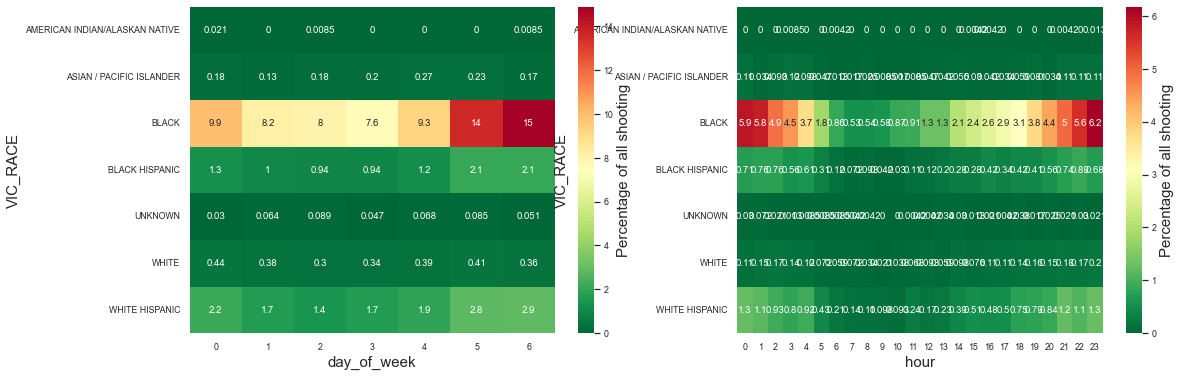

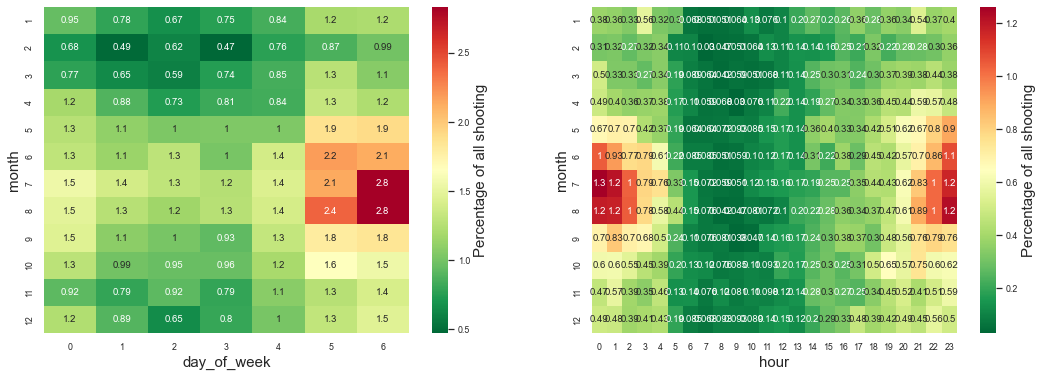

<Figure size 1296x432 with 0 Axes>

In [17]:
heatmap(df, col_names)
plt.clf()

Insights from plots
- Among all combination of race on perpetrator and victims, Black perpetrator on Black victims account for 30% of the shootings 
- Through the year, shootings are most concentrated between June and August and between 9:00 pm to 2:00 am 

<a href='#toc'>Back to table of content</a>

### <a id='timelapse'>5. Create the timelapse maps</a>

#### <a id='pop'> Read in precinct population data</a>

In [18]:
# read in data and have quick check if the info makes sense
p_pop = pd.read_csv('nyc_2010pop_2020precincts.csv')
display(len(p_pop)) # should have 77 precinct in nyc
q3=''' 
select sum(P0010001) as total_nyc_pop
from p_pop
'''
display(pysqldf(q3)) # should have around 8.17M poplulation in 2010
display(p_pop.tail(3))
df.head(1)

77

total_nyc_pop
0        8175133

precinct_2020  P0010001  P0010002  P0010003  P0010004  P0010005  P0010006  \
74            121    118708    114773     73769     16688       557     13217   
75            122    138982    136452    119790      3397       330      8474   
76            123     98032     96794     89264      1399       122      4551   

    P0010007  P0010008  P0010009  ...  P0020064  P0020065  P0020066  P0020067  \
74        78     10464      3935  ...         0         0         0         0   
75        43      4418      2530  ...         0         1         0         1   
76        33      1425      1238  ...         0         0         0         0   

    P0020068  P0020069  P0020070  P0020071  P0020072  P0020073  
74         0         0         0         0         0         0  
75         0         0         0         0         0         0  
76         0         0         0         0         0         0  

[3 rows x 145 columns]

INCIDENT_KEY OCCUR_DATE          OCCUR_TIME    BORO  PRECINCT  \
0     201575314 2019-08-23 2021-10-29 22:10:00  QUEENS       103   

   JURISDICTION_CODE LOCATION_DESC  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP  \
0                0.0           NaN                    False            NaN   

  PERP_SEX  ... Y_COORD_CD   Latitude  Longitude  \
0      NaN  ...     193561  40.697805 -73.808141   

                                         Lon_Lat  year quarter  month  \
0  POINT (-73.80814071699996 40.697805308000056)  2019       3      8   

   day_of_week week_of_year  hour  
0            4           34    22  

[1 rows x 25 columns]

In [19]:
# create a summary table to merge with the precinct pop 
q4=''' 
select precinct, year, count(1) as total_incidents 
from df
group by precinct, year
'''
summary = pysqldf(q4)
display(len(summary))
summary.head(7)

1053

PRECINCT  year  total_incidents
0         1  2007                1
1         1  2008                1
2         1  2009                1
3         1  2010                7
4         1  2012                2
5         1  2013                1
6         1  2015                1

In [20]:
# cross check: total incidents in the summary should equal to total rows in df
display(pysqldf('select sum(total_incidents) from summary'))
len(df)

sum(total_incidents)
0                 23565

23565

In [21]:
# get a sense of what the worst year in the worst precinct is like
q5=''' 
select precinct, year, total_incidents
from summary
order by total_incidents desc
limit 5;
/*get the 4th place: limit 5, 1*/
'''
pysqldf(q5)

PRECINCT  year  total_incidents
0        75  2020              136
1        73  2007              131
2        75  2011              131
3        75  2007              125
4        73  2020              117

<a href='#toc'>Back to table of content</a>

#### <a id='cast'> Prepare the casted df</a>

In [22]:
# create the first col necessary for merging
q6=''' 
select DISTINCT precinct
from summary
'''
initial_df = pysqldf(q6)
display(type(initial_df))
initial_df

pandas.core.frame.DataFrame

PRECINCT
0          1
1          5
2          6
3          7
4          9
..       ...
72       115
73       120
74       121
75       122
76       123

[77 rows x 1 columns]

In [23]:
# cast data into long form
def cast(df, key, value_col_name, fixed_vars, initial_df):
    # key = value in original col to be spread as new col heading
    # value_col_name = name of the col that has the value
    # fixed_vars = 1 or more of the cols that are unchanged
    #   for more than col, use list(fixed_vars) instead when merging
    # initial_df is pre-defined before running this function

    new_vars = df[key].unique()
#     print(new_vars)
    index = 0
    for v in new_vars:
#         print("v " + "is: " + str(v))
        df_v = df[df[key] == v] # only select (case or population row)
#         display(df_v)
        del df_v[key] # remove the col "key" from original
        # below rename the col "value" to "case" or to "population"
        #   depending on the iteration in the for loop
        df_v = df_v.rename(columns={value_col_name: str(v)})
#         display(df_v)
        # merge the current df_v to the df holder
        if index == 0:
            tibble = initial_df
#         tibble = tibble.merge(df_v, on=list(fixed_vars), how='left')            
        tibble = tibble.merge(df_v, on=fixed_vars, how='left')
#         print("tibble below")
#         display(tibble)
        index = index + 1
    return tibble

In [24]:
len(summary)

1053

In [25]:
# create the casted data summary and check the outcome
casted_summary = cast(summary, 'year', 'total_incidents', "PRECINCT", initial_df)
display(casted_summary.head(2))
casted_summary.columns
# col_name = [str(i) for i in casted_df.columns]


PRECINCT  2007  2008  2009  2010  2012  2013  2015  2017  2019  2020  2006  \
0         1   1.0   1.0   1.0   7.0   2.0   1.0   1.0   2.0   2.0   3.0   NaN   
1         5   NaN  14.0   3.0   1.0   7.0   2.0   5.0   NaN   3.0   4.0   3.0   

   2011  2014  2018  2016  
0   NaN   NaN   NaN   NaN  
1   1.0   3.0   2.0   NaN

Index(['PRECINCT', '2007', '2008', '2009', '2010', '2012', '2013', '2015',
       '2017', '2019', '2020', '2006', '2011', '2014', '2018', '2016'],
      dtype='object')

In [26]:
# sort col names in ascending year for creating the gif animation
sorted_col = sorted(list(casted_summary.columns)) #2006 - #2020 in asc order
# reorder the col name
casted_summary = casted_summary[sorted_col]
casted_summary.head(2)

2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
0   NaN   1.0   1.0   1.0   7.0   NaN   2.0   1.0   NaN   1.0   NaN   2.0   
1   3.0   NaN  14.0   3.0   1.0   1.0   7.0   2.0   3.0   5.0   NaN   NaN   

   2018  2019  2020  PRECINCT  
0   NaN   2.0   3.0         1  
1   2.0   3.0   4.0         5

In [27]:
# cross check: missing value summary total cell minus NaN cell should equal to the len of summary
display(77*15) # 1155 total cell in casted_summary
display(casted_summary.isnull().sum().sum()) # 102
display(len(summary))

1155

102

1053

In [28]:
# fill the missing value with zeros and check the results
casted_summary = casted_summary.fillna(0)
casted_summary.isnull().sum() 

2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
PRECINCT    0
dtype: int64

Work on the NYC precinct .shp file

precinct    shape_leng    shape_area  \
0         1  79979.409545  4.718216e+07   
1         5  18676.124259  1.808880e+07   
2         6  27182.610113  2.213193e+07   
3        71  29978.094261  4.533179e+07   
4        72  89173.452605  1.046502e+08   

                                            geometry  
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...  
1  POLYGON ((-73.98864 40.72293, -73.98869 40.722...  
2  POLYGON ((-73.99968 40.73855, -73.99684 40.737...  
3  POLYGON ((-73.92854 40.66457, -73.92872 40.664...  
4  POLYGON ((-73.99841 40.67187, -73.99830 40.671...

<AxesSubplot:>

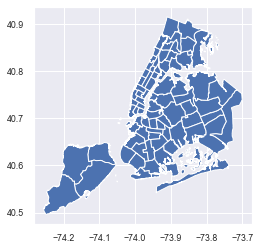

In [29]:
# Ensure all the file which come with .shp file should be in same folder
# load in a shapefile
fp = 'nyu-2451-34568-shapefile/nyu_2451_34568.shp'
map_df = gpd.read_file(fp)
display(map_df.head())
map_df.plot()

In [30]:
type(map_df)
map_df.columns

Index(['precinct', 'shape_leng', 'shape_area', 'geometry'], dtype='object')

<a href='#toc'>Back to table of content</a>

#### <a id='merge'>Merge nyc shooting, nyc precinct population, and nypd precinct map files together</a>

In [31]:
display(casted_summary.head(2))
display(map_df.head(2))
display(p_pop.head(2))

2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
0   0.0   1.0   1.0   1.0   7.0   0.0   2.0   1.0   0.0   1.0   0.0   2.0   
1   3.0   0.0  14.0   3.0   1.0   1.0   7.0   2.0   3.0   5.0   0.0   0.0   

   2018  2019  2020  PRECINCT  
0   0.0   2.0   3.0         1  
1   2.0   3.0   4.0         5

precinct    shape_leng    shape_area  \
0         1  79979.409545  4.718216e+07   
1         5  18676.124259  1.808880e+07   

                                            geometry  
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...  
1  POLYGON ((-73.98864 40.72293, -73.98869 40.722...

precinct_2020  P0010001  P0010002  P0010003  P0010004  P0010005  P0010006  \
0              1     66679     64416     50484      2162        89     10569   
1              5     52568     51415     13436      2784        81     32795   

   P0010007  P0010008  P0010009  ...  P0020064  P0020065  P0020066  P0020067  \
0        26      1086      2263  ...         0         1         1         0   
1        18      2301      1153  ...         0         1         1         0   

   P0020068  P0020069  P0020070  P0020071  P0020072  P0020073  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  

[2 rows x 145 columns]

In [32]:
# rename all relevant columns so that they are all 'precinct'
casted_summary = casted_summary.rename( columns={"PRECINCT" : "precinct"} )
p_pop = p_pop.rename( columns={"precinct_2020" : "precinct"} )

In [33]:
# merge the files
final =map_df.merge(casted_summary, on=['precinct'],how='right').merge(p_pop, on=['precinct'], how='left')
display(len(final))
final.head(2)

77

precinct    shape_leng    shape_area  \
0         1  79979.409545  4.718216e+07   
1         5  18676.124259  1.808880e+07   

                                            geometry  2006  2007  2008  2009  \
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...   0.0   1.0   1.0   1.0   
1  POLYGON ((-73.98864 40.72293, -73.98869 40.722...   3.0   0.0  14.0   3.0   

   2010  2011  ...  P0020064  P0020065  P0020066  P0020067  P0020068  \
0   7.0   0.0  ...         0         1         1         0         0   
1   1.0   1.0  ...         0         1         1         0         0   

   P0020069  P0020070  P0020071  P0020072  P0020073  
0         0         0         0         0         0  
1         0         0         0         0         0  

[2 rows x 163 columns]

<a href='#toc'>Back to table of content</a>

#### <a id='gif'>Create gif file of shooting in precinct</a>

In [35]:
# get the year names
wanted_years = sorted_col[:15]
wanted_years

['2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [36]:
# this fn plot each year's data and save each image in the designated folder 
# geo_df = GeoDataFrame
# years = list of name of years 
def plotmap(geo_df, years, folder, max_incident, cmap):
    if os.path.isdir(folder) is False:
        os.makedirs(folder)

    for year in years:
        vmin, vmax = 0, max_incident # set the range for the choropleth
        # create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(14, 8))
        # create map; cmap = the color
        # column = color the shape file base on the assigned variable
        # other possible argument: figsize = (10,10)
        geo_df.plot(column=year, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
        ax.axis('off') # remove the axis
        ax.set_title('Shooting incidents in New York City in {}'.format(year), \
                     fontdict={'fontsize': '25','fontweight' : '3'})
        # create an annotation for the  data source
        # ax.annotate('Source: data.cityofnewyork.us',
        #            xy=(0.1, .08), xycoords='figure fraction',
        #            horizontalalignment='left', verticalalignment='top',
        #            fontsize=15, color='#555555')
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cbar = fig.colorbar(sm)   
        # this will save the figure as a high-res png. you can also save as svg
        fig.savefig(folder+'img{}.png'.format(year),dpi=300)
#         fig.savefig('./nyc_shooting/img{}.png'.format(year),dpi=300)

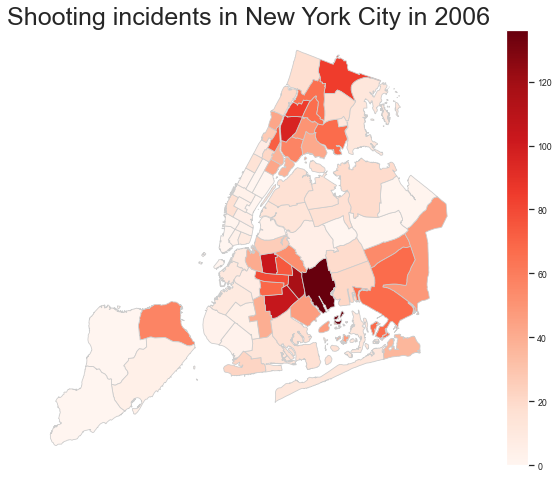

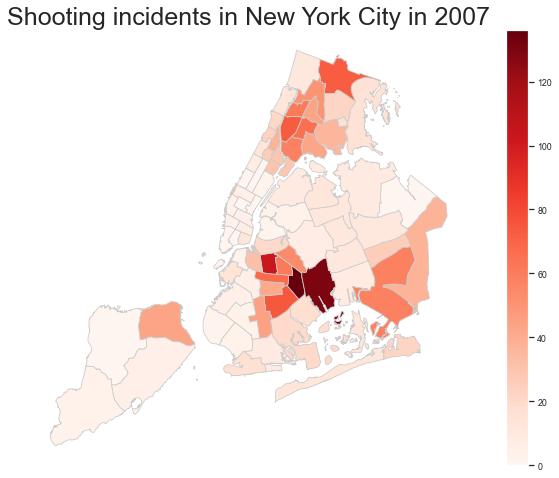

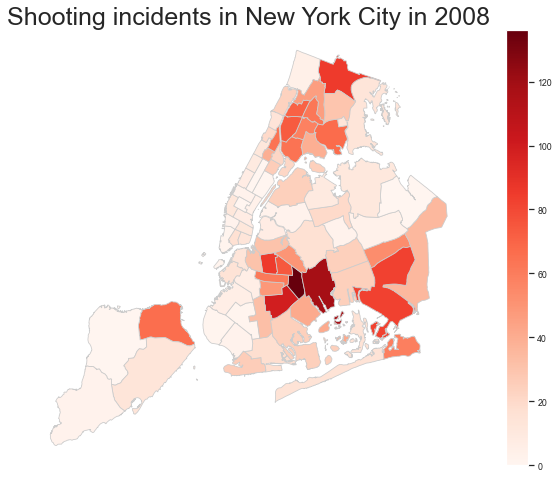

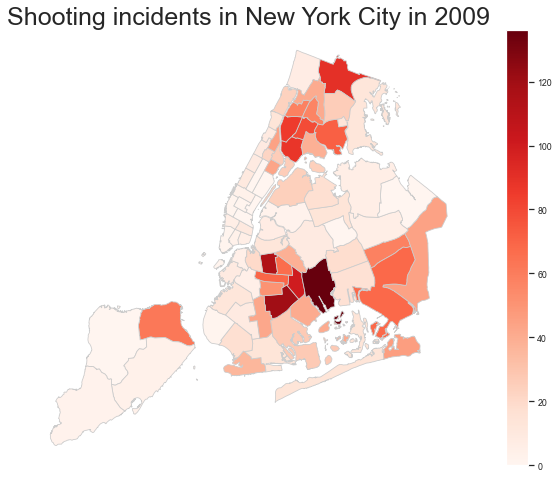

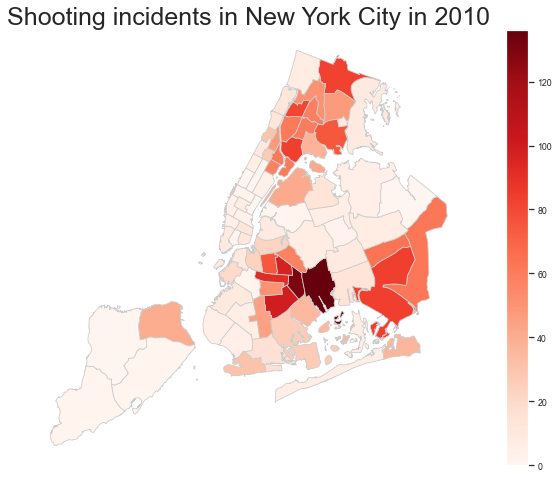

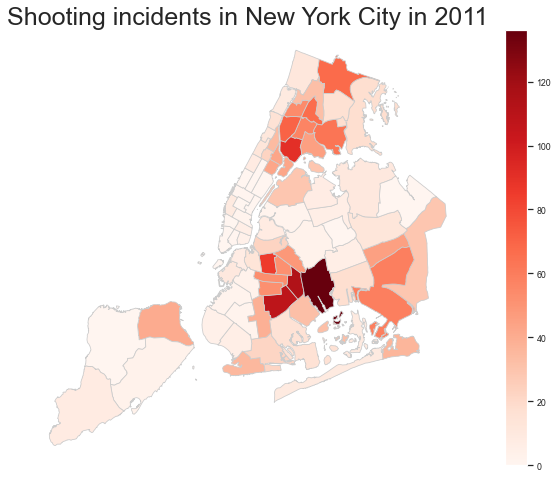

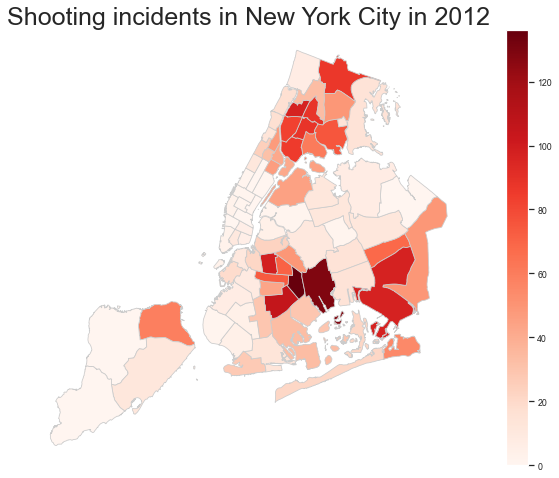

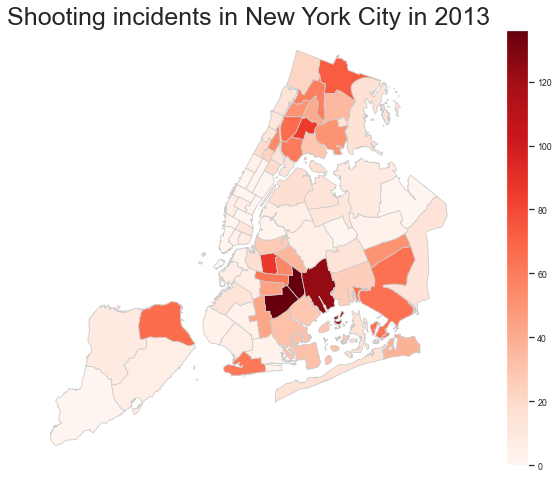

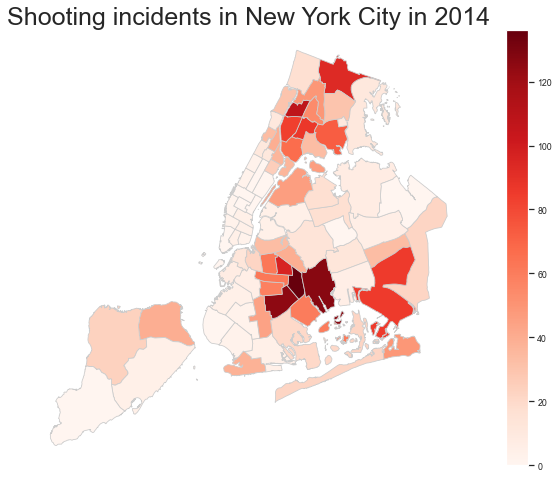

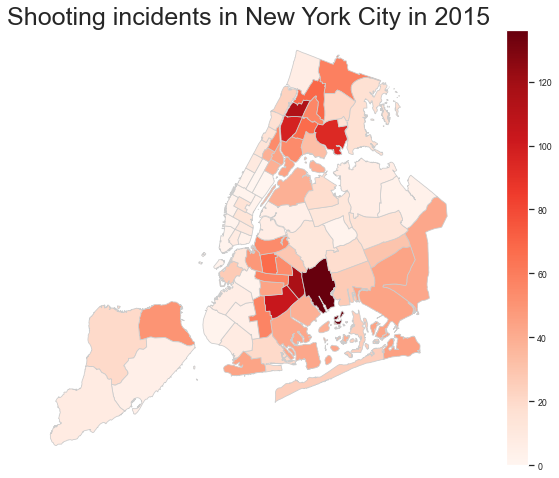

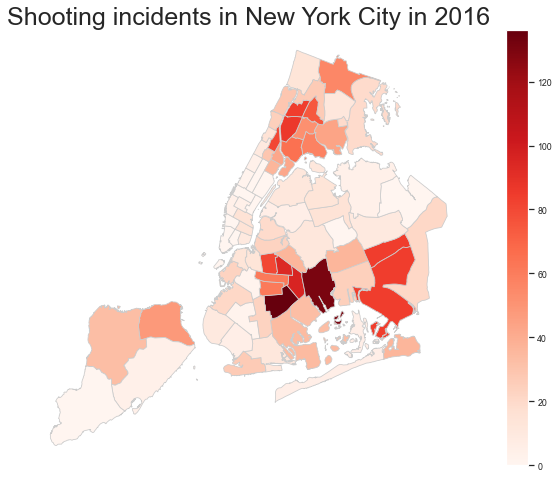

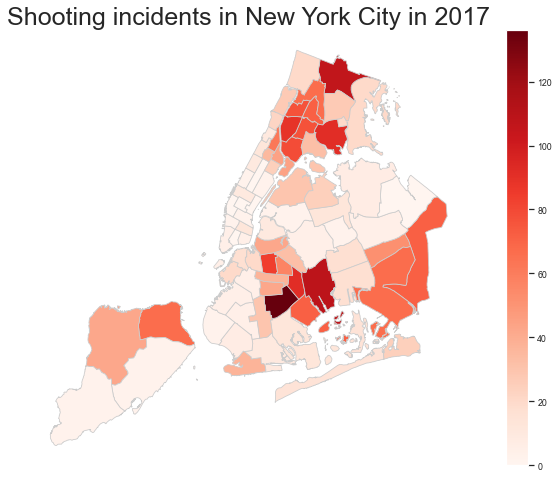

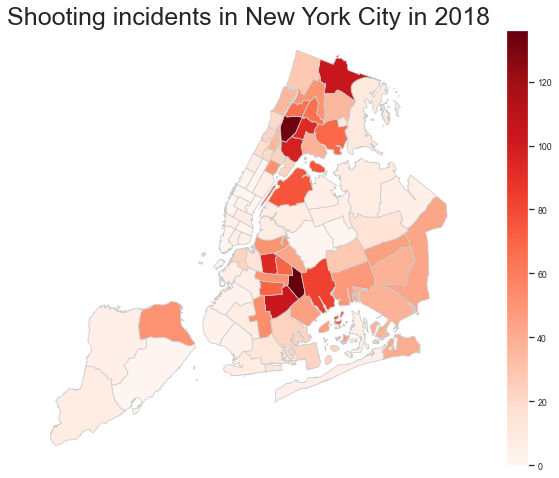

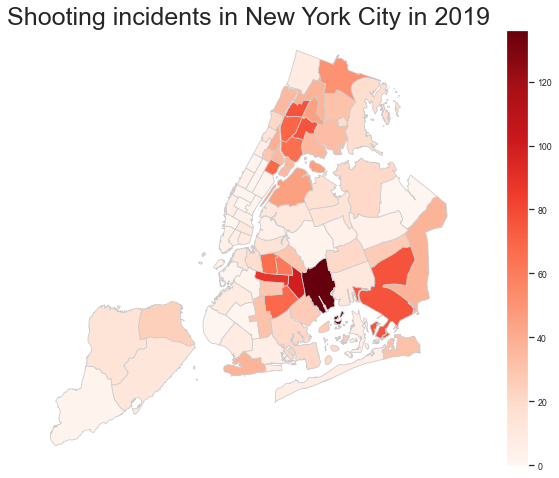

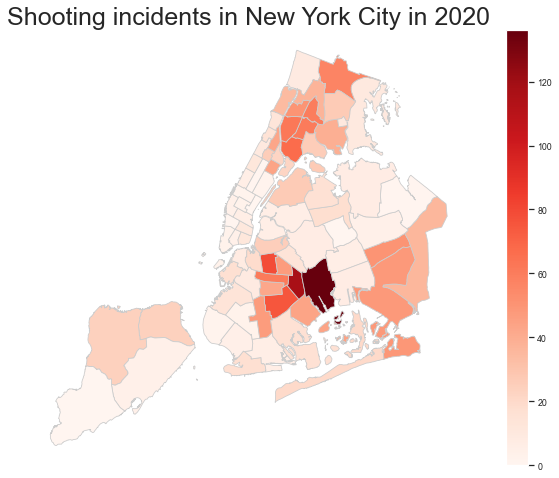

In [37]:
shoot_per_precinct = './shoot_per_precinct/'
plotmap(final, wanted_years, shoot_per_precinct, 136, 'Reds') # 136 is the max incident across all precincts all years

In [38]:
# create the gif animation
def make_gif(folder, saved_file_name):
#     png_dir = './nyc_shooting/'
    if os.path.isdir(folder) is False:
        os.makedirs(folder)

    images = []
    for file_name in sorted(os.listdir(folder)):
#         print(file_name)
        if file_name.endswith('.png'):
            file_path = os.path.join(folder, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave(folder+saved_file_name, images, duration = 0.8)

In [39]:
make_gif(shoot_per_precinct, 'per_precinct.gif')

<a href='#toc'>Back to table of content</a>

#### <a id='percapita'>Create shooting incidents per 10000 people gif animated graph</a>

In [40]:
# create a col that represents shootings per 10,000 people
year_per_capita=[] # holds the newly created col names
final2 = final
for year in wanted_years:
    new_col_name = year+" per 10000 people"
    year_per_capita.append(new_col_name)
#     print(str(final2[year]) + str(final2['P0010001']))
    final2[new_col_name]=final2[year]/final2['P0010001']*10000 # col P0010001 has the precinct population in 2010 
year_per_capita

['2006 per 10000 people',
 '2007 per 10000 people',
 '2008 per 10000 people',
 '2009 per 10000 people',
 '2010 per 10000 people',
 '2011 per 10000 people',
 '2012 per 10000 people',
 '2013 per 10000 people',
 '2014 per 10000 people',
 '2015 per 10000 people',
 '2016 per 10000 people',
 '2017 per 10000 people',
 '2018 per 10000 people',
 '2019 per 10000 people',
 '2020 per 10000 people']

In [41]:
final2.tail(4)

precinct     shape_leng    shape_area  \
73       120   96174.468481  2.325348e+08   
74       121  138107.011093  4.757146e+08   
75       122  154884.929301  4.547809e+08   
76       123  120869.367192  4.607895e+08   

                                             geometry  2006  2007  2008  2009  \
73  POLYGON ((-74.05357 40.60370, -74.05407 40.603...  49.0  42.0  56.0  50.0   
74  MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...   0.0   0.0   0.0   0.0   
75  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...   4.0   5.0  11.0   3.0   
76  POLYGON ((-74.16983 40.56108, -74.16974 40.560...   0.0   3.0   2.0   2.0   

    2010  2011  ...  2011 per 10000 people  2012 per 10000 people  \
73  32.0  39.0  ...               3.451083               3.628062   
74   0.0   0.0  ...               0.000000               0.000000   
75   1.0   3.0  ...               0.215855               0.575614   
76   1.0   8.0  ...               0.816060               0.000000   

    2013 per 10000 people  2014 per 10000 people  2015 per 10000 people  \
73               3.716551               2.212233               2.654679   
74               0.505442               1.263605               1.010884   
75               0.287807               0.215855               0.215855   
76               0.000000               0.000000               0.510038   

    2016 per 10000 people  2017 per 10000 people  2018 per 10000 people  \
73               2.212233               2.389211               1.769786   
74               1.432085               1.432085               0.168481   
75               0.143904               0.071952               0.000000   
76               0.000000               0.102008               0.306023   

    2019 per 10000 people  2020 per 10000 people  
73               1.061872               2.123743  
74               0.589682               2.021768  
75               0.431711               0.287807  
76               0.102008               0.000000  

[4 rows x 178 columns]

In [42]:
# find the max shootings as input argument
holder = []
for year in year_per_capita:
    print(str(year) + ": " + str(max(final2[year])))
    holder.append(max(final2[year]))
max(holder)

2006 per 10000 people: 11.680621732895405
2007 per 10000 people: 15.150113336725726
2008 per 10000 people: 13.299717814682888
2009 per 10000 people: 10.192437654409892
2010 per 10000 people: 12.435827939160104
2011 per 10000 people: 12.605819493916824
2012 per 10000 people: 10.871073692001664
2013 per 10000 people: 9.945875930980248
2014 per 10000 people: 9.945875930980248
2015 per 10000 people: 7.9798306888097335
2016 per 10000 people: 7.812250884856987
2017 per 10000 people: 4.27903964472406
2018 per 10000 people: 6.245084886894573
2019 per 10000 people: 5.55118656612851
2020 per 10000 people: 400.0


400.0

The 400 shooting per 10,000 people is abnormaly high.  It needs further investigation 

In [43]:
# find out the precinct where the abnormaly happens
final2[final2['2020 per 10000 people']==400]

precinct   shape_leng    shape_area  \
12        22  32701.34917  3.830139e+07   

                                             geometry  2006  2007  2008  2009  \
12  POLYGON ((-73.94923 40.79687, -73.94942 40.796...   0.0   0.0   0.0   0.0   

    2010  2011  ...  2011 per 10000 people  2012 per 10000 people  \
12   0.0   0.0  ...                    0.0                    0.0   

    2013 per 10000 people  2014 per 10000 people  2015 per 10000 people  \
12                    0.0                    0.0                    0.0   

    2016 per 10000 people  2017 per 10000 people  2018 per 10000 people  \
12                    0.0                    0.0                    0.0   

    2019 per 10000 people  2020 per 10000 people  
12                    0.0                  400.0  

[1 rows x 178 columns]

In [44]:
# find out the number of shooting happens in precinct 22
final2[final2['2020 per 10000 people']==400]['2020']

12    1.0
Name: 2020, dtype: float64

In [45]:
# look at the population of precinct 22
p_pop[p_pop['precinct']==22]

precinct  P0010001  P0010002  P0010003  P0010004  P0010005  P0010006  \
12        22        25        25         6        18         0         0   

    P0010007  P0010008  P0010009  ...  P0020064  P0020065  P0020066  P0020067  \
12         0         1         0  ...         0         0         0         0   

    P0020068  P0020069  P0020070  P0020071  P0020072  P0020073  
12         0         0         0         0         0         0  

[1 rows x 145 columns]

In [46]:
# Given the population in precinct 22 is abnormally small, exclude precinct 22 for per capita gif creation
final2 = final2[final2['precinct']!=22]

In [47]:
# find the next biggest shooting value 
holder=holder[0:-1]

In [48]:
max(holder)

15.150113336725726

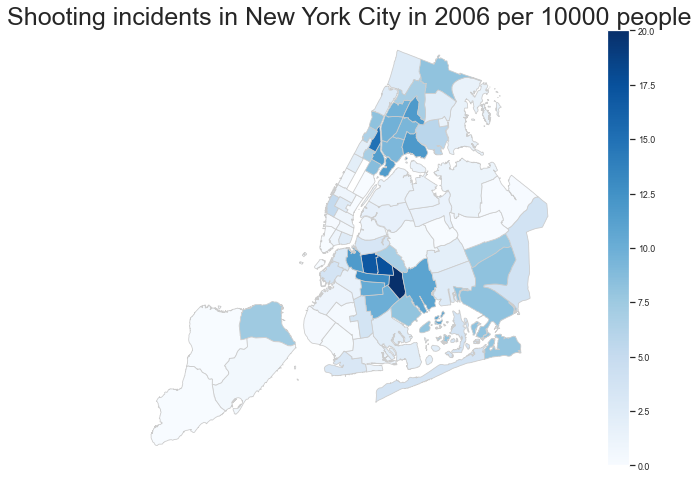

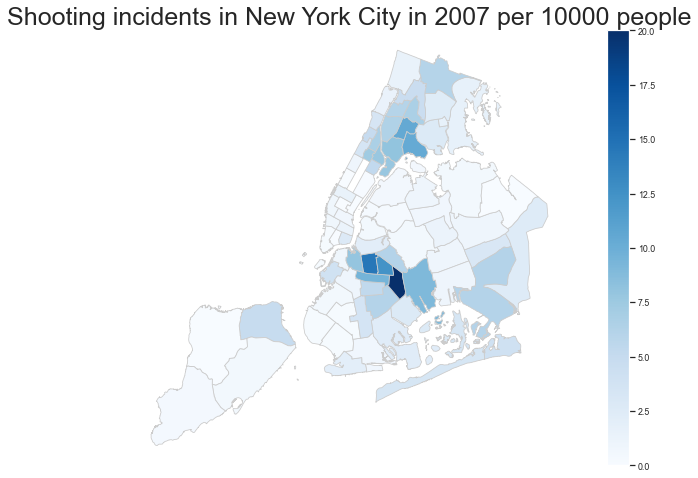

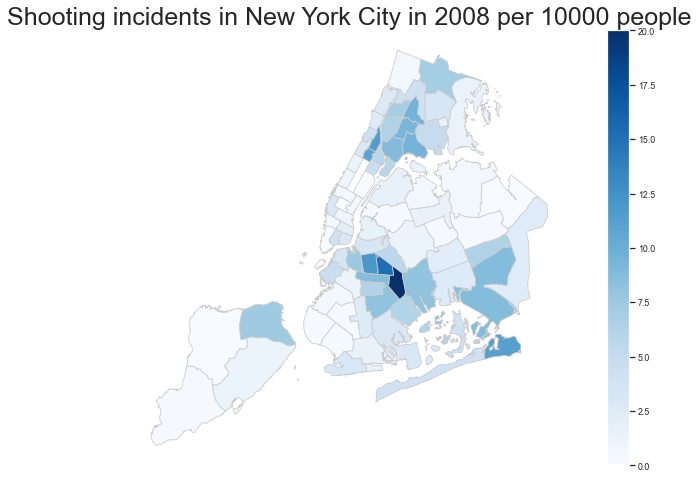

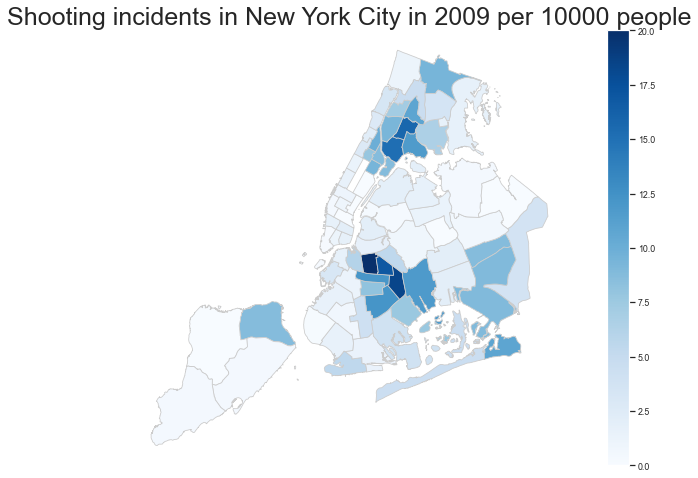

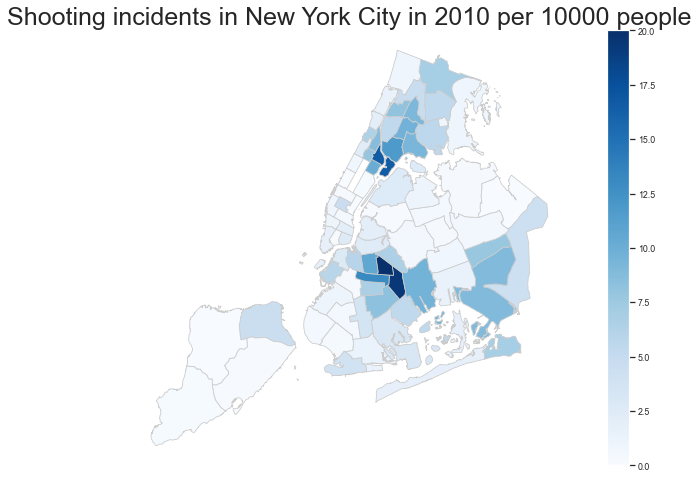

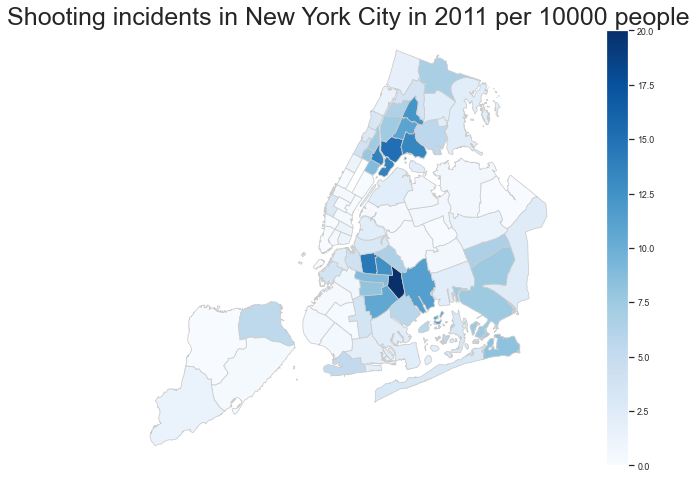

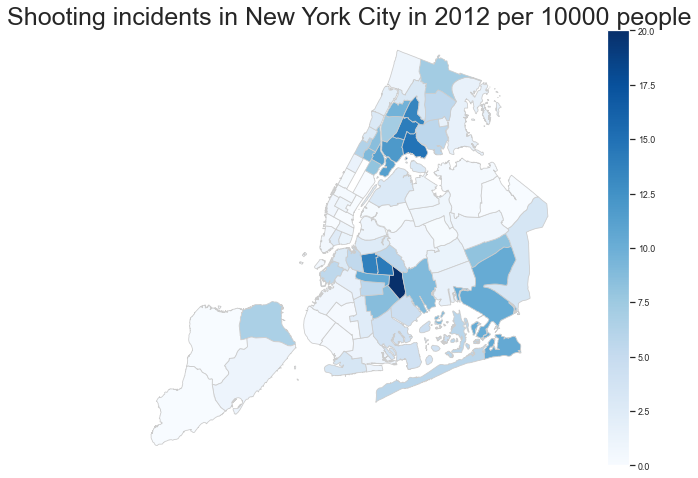

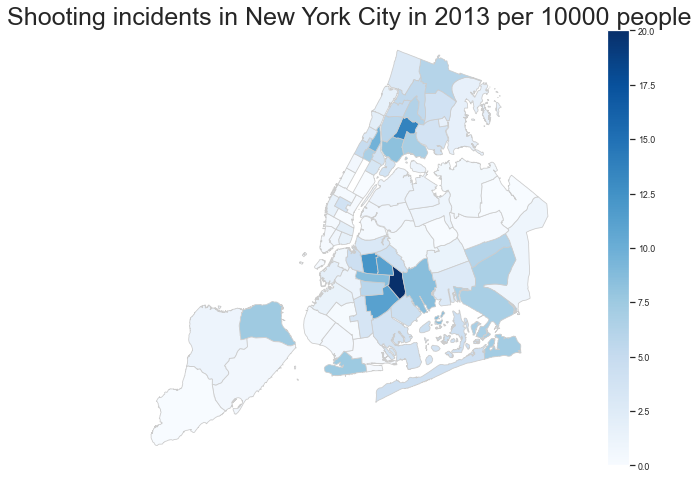

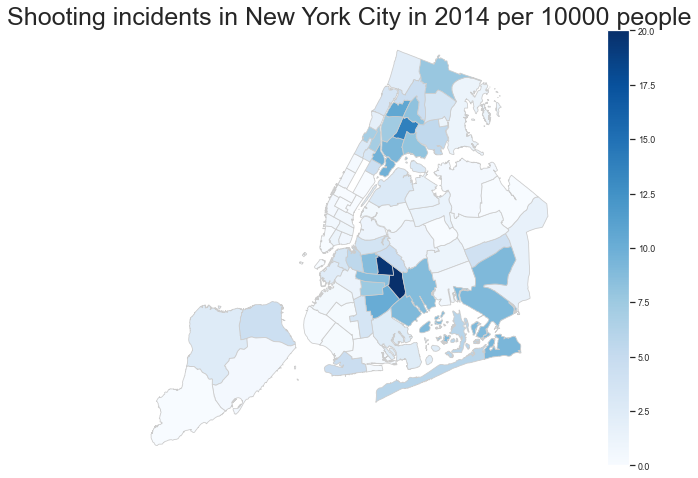

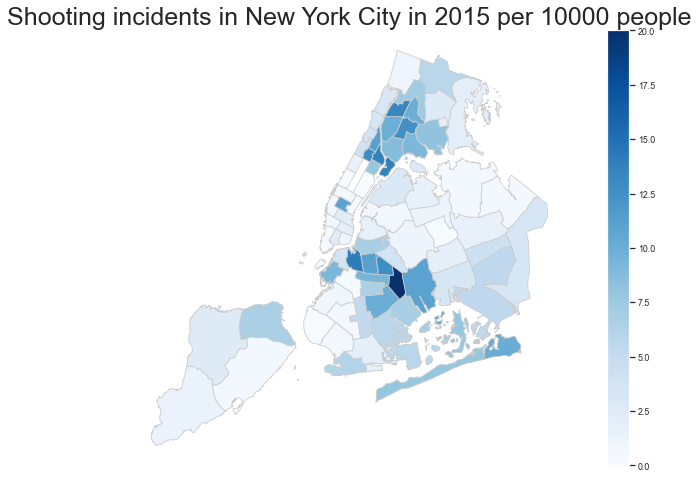

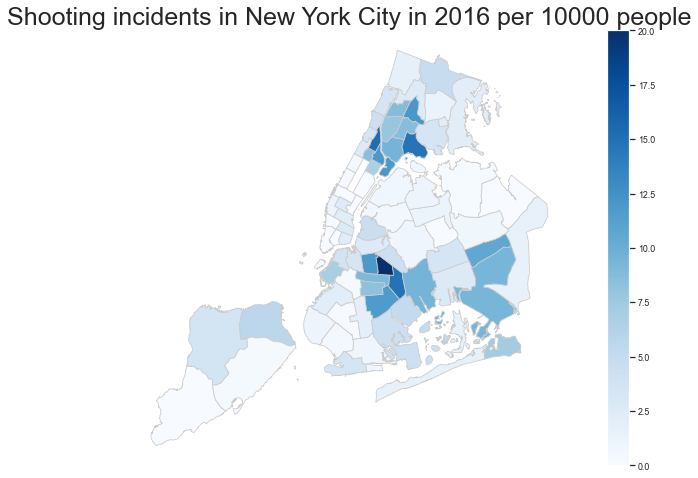

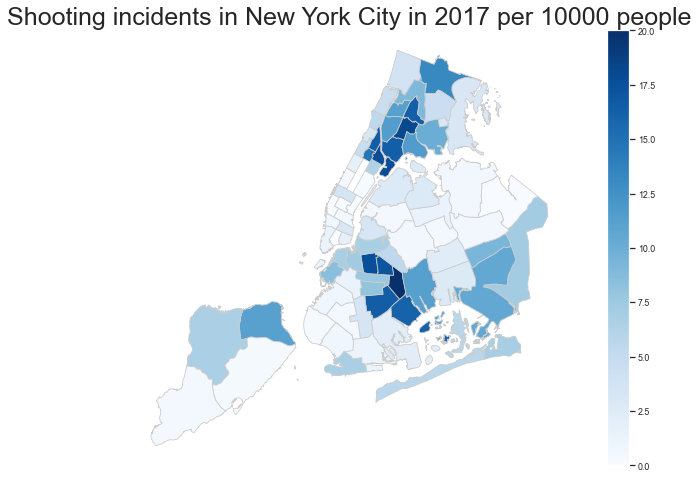

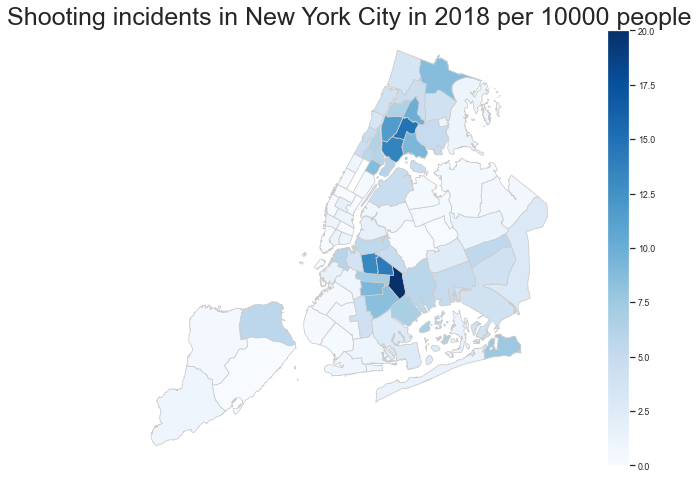

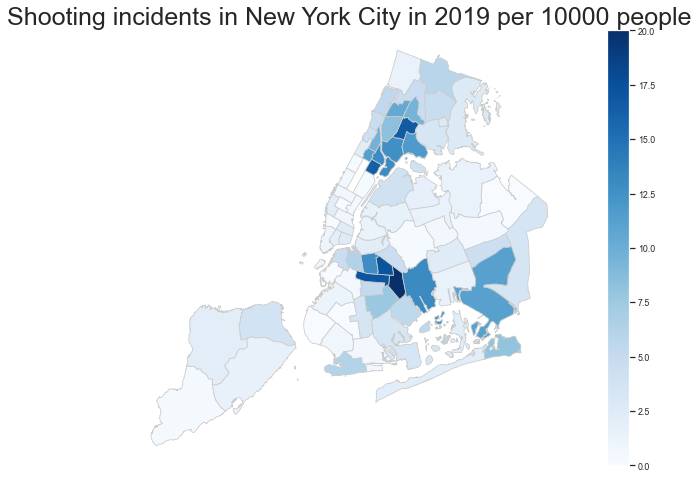

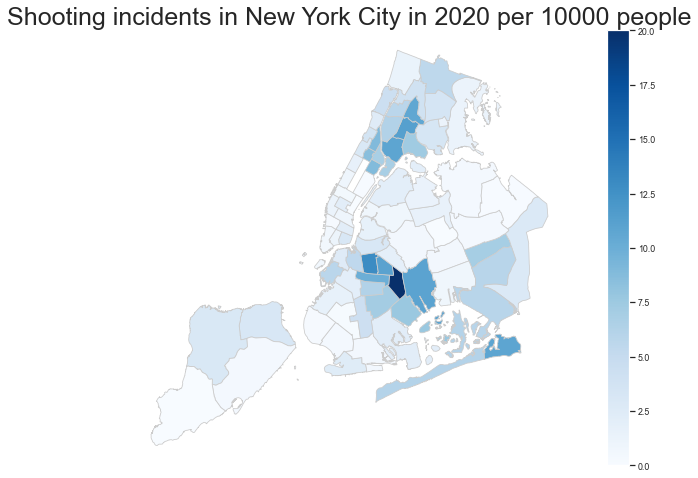

In [49]:
shoot_per_capita = './shoot_per_capita/'
plotmap(final2, year_per_capita, shoot_per_capita, 20, 'Blues')

In [50]:
make_gif(shoot_per_capita, 'per_capita.gif')

<a href='#toc'>Back to table of content</a>